# Data 620 assignment 1:  “hello, graph world” 

## Group 1 Members:
- Tze Fung Lung, Jim
- Yun Mai
- Ahsanul Choudhury


### Process: When software developers are starting to work in a new environment, they are encouraged to start with a simple “beachhead” program. 

In [57]:
import graphlab as gl
gl.canvas.set_target('ipynb') # use IPython Notebook output for GraphLab

In [58]:
vertices = gl.SFrame.read_csv('https://raw.githubusercontent.com/fung1091/data620/master/hw1/vertices.csv')
edges = gl.SFrame.read_csv('https://raw.githubusercontent.com/fung1091/data620/master/hw1/edges.csv')

Finished parsing file https://raw.githubusercontent.com/fung1091/data620/master/hw1/vertices.csv

Parsing completed. Parsed 10 lines in 0.062497 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://raw.githubusercontent.com/fung1091/data620/master/hw1/vertices.csv

Parsing completed. Parsed 10 lines in 0.109382 secs.

Finished parsing file https://raw.githubusercontent.com/fung1091/data620/master/hw1/edges.csv

Parsing completed. Parsed 36 lines in 0.062499 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://raw.githubusercontent.com/fung1091/data620/master/hw1/edges.csv

Parsing completed. Parsed 36 lines in 0.076524 secs.

In [59]:
# SFrame has a number of methods to explore and transform your data
vertices.show()

In [60]:
# this shows the summary of the edges SFrame
edges.show()

# Create a graph object

In [61]:
g = gl.SGraph()

In [62]:
edges[(edges['src'] !='diane') & (edges['dst'] !='andre')]

src,dst
andre,carol
carol,fernando
fernando,carol
carol,diane
andre,diane
andre,fernando
fernando,diane
beverly,diane
beverly,garth
garth,beverly


In [63]:
# add some vertices in a dataflow-ish way
g = g.add_vertices(vertices=vertices, vid_field='name')

In [64]:
# more dataflow
g = g.add_edges(edges=edges, src_field='src', dst_field='dst')

In [65]:
g.show(vlabel="id")

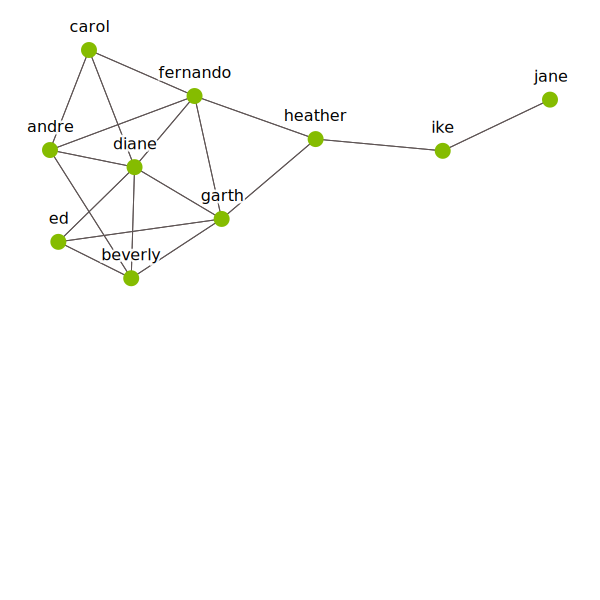

In [66]:
from IPython.display import SVG
def show_svg():
    return SVG(url='https://raw.githubusercontent.com/fung1091/data620/master/hw1/data620hw1.svg')
show_svg()


# Apply the pagerank algorithm to our graph

In [67]:
pr = gl.pagerank.create(g)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 2.49333               |

| 2         | 1.07733               |

| 3         | 0.738986              |

| 4         | 0.501417              |

| 5         | 0.33979               |

| 6         | 0.256258              |

| 7         | 0.170334              |

| 8         | 0.129226              |

| 9         | 0.0853165             |

| 10        | 0.0651076             |

| 11        | 0.0427623             |

| 12        | 0.0328138             |

| 13        | 0.0214502             |

| 14        | 0.0165451             |

| 15        | 0.0107679             |

| 16        | 0.00834577            |

+-----------+-----------------------+

In [68]:
pr.get('pagerank').topk(column_name='pagerank')

__id,pagerank,delta
diane,1.47113788753,0.000402861444182
fernando,1.28866352405,0.000619352316094
garth,1.28866352405,0.000619352316094
andre,1.01892307246,0.000201729912852
beverly,1.01892307246,0.000201729912852
heather,0.953682942928,0.00165781968312
ike,0.856658205613,0.00293418253803
ed,0.79401050297,0.000201434171881
carol,0.79401050297,0.000201434171881
jane,0.515326764964,0.00130587787346


Pagerank rankings are definitely related to the graph as we can see that Diane is the top ranking element as she has 7 links to others.